In [1]:
from illustris import getGalaxy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division
from matplotlib import gridspec
%matplotlib inline

In [117]:
# Getting data from a particular galaxy (from online)

# Here we pick which kinds of particles we want (0-gas, 4-stars)
# and what information about them 
# (see http://www.illustris-project.org/data/docs/specifications/)
fields=[
    [4,'Coordinates'],
    [4,'Velocities'],
    [4,'Masses'],
    [0,'Masses'],
    [0,'StarFormationRate'],
    [4,'Potential'],
    [4,'SubfindHsml'],
    [0,'Coordinates'],
    [0,'InternalEnergy']
]
# Here we actually pull the data from online
data=getGalaxy(15,fields)

# And here we put it into simple numpy arrays to work with
rStar=data[0][:,:]
vStar=data[1][:,:]
mStar=data[2][:]
mGas=data[3][:]
SFRGas=data[4][:]
PStar=data[5][:]
HSStar=data[6][:]
rGas=data[7][:,:]
IGas=data[8][:]

In [118]:
# A few useful functions to build from

# given the position and masses of the stars finds their center of mass
def findCenterMass(r,m):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(r[:,i]*m[:])/np.sum(m[:])
    return com

# given the position and masses of the stars, some number of pixels and some distance finds
# the projected total mass
def findPixels(r,quantity,nPixels,span):
    pixels=np.zeros((nPixels,nPixels))
    for i in range(nPixels):
        for j in range(nPixels):
            inPix=np.argwhere((span*(((2*i)/nPixels)-1)<r[:,0])
                            &(span*(((2*j)/nPixels)-1)<r[:,1])
                         &(span*(((2*(i+1))/nPixels)-1)>r[:,0])
                         &(span*(((2*(j+1))/nPixels)-1)>r[:,1]))
            if inPix.size==0:
                continue
            pixels[i,j]=np.sum(quantity[inPix])
    return pixels

In [119]:
# Moving all the co-ordinates such that the galaxy's centered on (0,0,0)

nStar=len(mStar)
nGas=len(mGas)
starCom=findCenterMass(rStar,mStar) # finds the center of mass
gasCom=findCenterMass(rGas,mGas)
rGas=rGas-starCom
rStar=rStar-starCom # recenters all positions around the center of mass

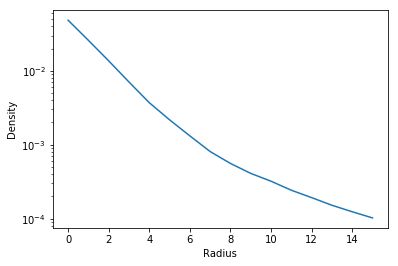

In [120]:
# Finding and plotting the density profile

# finds the distance between every particle and the origin
rSquared=np.zeros(nStar)
for i in range(3):
    rSquared+=rStar[:,i]**2
r=np.sqrt(rSquared) 

# finds all particles in each of a series of radial bins,
# finds the total mass in that bin and divides by the volume
nBins=16
rMax=16
rBins=np.linspace(0,rMax,nBins+1)
density=np.zeros(nBins)
for i in range(nBins):
    inBin=np.argwhere((r>rBins[i]) & (r<rBins[i+1]))
    if inBin.size==0:
        continue
    density[i]=np.sum(mStar[inBin])/(4*np.pi*(np.power(rBins[i+1],3) - np.power(rBins[i],3))/3)

# plots the denisty
densPlot=plt.gca()
densPlot.semilogy(rBins[:-1],density)
densPlot.set_ylabel('Density')
densPlot.set_xlabel('Radius')
plt.show(densPlot)

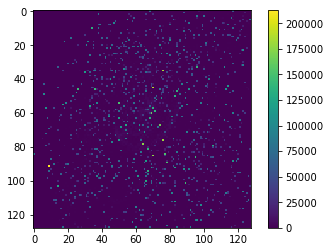

In [122]:
# Making a simple image of the galaxy

pixels=findPixels(rGas,IGas,128,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels, interpolation= 'None')
plt.colorbar(image)
plt.show(galaxyPlot)